In [19]:
import numpy as np
import matplotlib.pyplot as plt

MANDELBROTOVA MNOŽINA


In [23]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    #Na vstupu je pomocí x,y zadán interval množiny velikosti n, k je počet iterací a na výstupu matice množiny

    #vytvoření matice na daném intervalu
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X,Y = np.meshgrid(x, y*1j)
    
    #vytvoření komplexního čísla c a posloupnosti z
    c = X + Y
    z = np.zeros(c.shape)
    
    #pomocná matice, do které ukládám iterace, kdy absolutní hodnota z < 2
    divergence_matrix = np.zeros(c.shape)
    
    #cyklus pro vytvoření matice
    for i in range(k):
        z = z ** 2 + c
        index = np.abs(z) < 2
        divergence_matrix[index] = i
        
    return divergence_matrix



C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\169063769.py:18: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\169063769.py:18: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\169063769.py:19: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


JULIOVA MNOŽINA

In [25]:
def julia_set(c = -1.476 +0j, x_min = -2, x_max = 2, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    #Na vstupu je pomocí x,y zadán interval množiny velikosti n, komplexní číslo c, k je počet iterací a na výstupu matice množiny
    
    #vytvoření matice na daném intervalu
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X,Y = np.meshgrid(x, y*1j)
    
    #posloupnost z
    z = X + Y

    #pomocná matice, do které ukládám iterace, kdy absolutní hodnota z < 2
    divergence_matrix = np.zeros(z.shape)
    
    #cyklus pro vytvoření matice
    for i in range(k):
        z = z ** 2 + c
        index = np.abs(z) < 2
        divergence_matrix[index] = i
        
    return divergence_matrix

INTERAKTIVNÍ FUNKCE

Změna barvy množiny

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:14: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


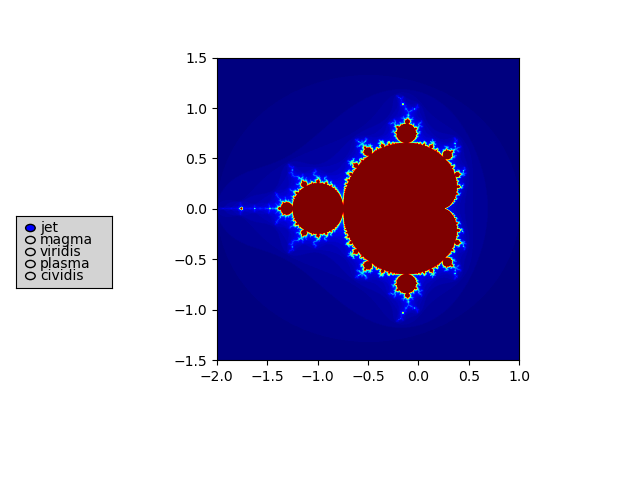

In [29]:
from matplotlib.widgets import RadioButtons
%matplotlib widget

#vytvoření pole, ne kterém generuji graf
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

#zde vytvořím mandelbrotovu množinu
divergence_matrix = mandelbrot_set()
im = plt.imshow(divergence_matrix, extent=[-2, 1, -1.5, 1.5], cmap = "jet")

#množina barev, mezi kterými je možno měnit
colors = ["jet", "magma", "viridis", "plasma", "cividis"]

#vytvoření tlačítek pro změnu barvy
rax = plt.axes([0.025, 0.4, 0.15, 0.15], facecolor='lightgray')
radio = RadioButtons(rax, colors)

#funkce pro změnu barvy
def change_colormap(label):
    im.set_cmap(label)
    fig.canvas.draw()


radio.on_clicked(change_colormap)

#vykreslení
plt.xlim([-2, 1])
plt.ylim([-1.5, 1.5])
plt.show()


Změna počtu iterací

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:14: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


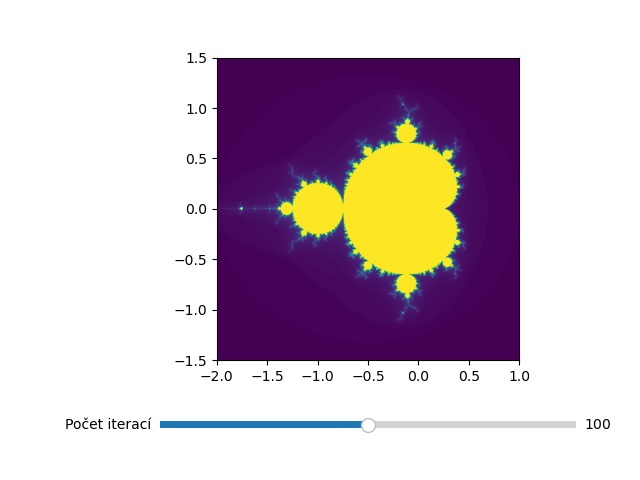

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:14: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


In [30]:
from matplotlib.widgets import Slider
%matplotlib widget

k = 100

#vytvoření pole, na kterém generuji graf
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.25, bottom=0.25)

#zde vytvořím mandelbrotovu množinu
divergence_matrix = mandelbrot_set()
im = plt.imshow(divergence_matrix, extent=[-2, 1, -1.5, 1.5])


#vytvoření interaktivního prvku
axk = fig.add_axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(
    ax=axk,
    label = "Počet iterací",
    valmin=0,
    valmax=200,
    valinit=k,
)


# Funkce na změnu hodnoty iterací
def update(val):
    k = int(slider.val)
    divergence_matrix = mandelbrot_set(k=k)
    im.set_data(divergence_matrix)
    fig.canvas.draw_idle()


slider.on_changed(update)

#vykreslení grafu
plt.show()

Změna komplexního čísla c na Juliově množině

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:18: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


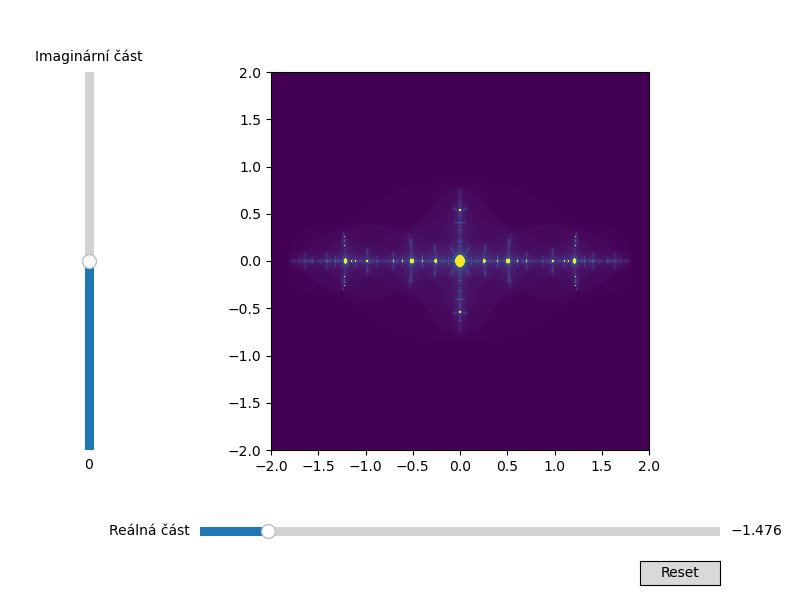

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:18: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:17: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\1985864260.py:18: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


In [31]:
from matplotlib.widgets import Button
%matplotlib widget

#vytvoření pole, na kterém generuji graf
fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(left=0.25, bottom=0.25)

#vytvoření komplexního čísla c
r = -1.476
i = 0
c = r + i * 1j

#zde vytvořím Juliovu množinu
divergence_matrix = julia_set()
im = plt.imshow(divergence_matrix,extent=[-2, 2, -2, 2], interpolation="nearest")


# Vytvoření interaktvích prvků:
#pro reálnou část
axr = fig.add_axes([0.25, 0.1, 0.65, 0.03])
r_slider = Slider(
    ax=axr,
    label = "Reálná část",
    valmin = -2,
    valmax=2,
    valinit=r,
)

#pro imaginární část
axi = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
i_slider = Slider(
    ax=axi,
    label="Imaginární část",
    valmin = -2,
    valmax=2,
    valinit=i,
    orientation="vertical"
)


#funkce na změnu hodnoty c
def update(val):
    r = r_slider.val
    i = i_slider.val
    c = r + i*1j

    divergence_matrix = julia_set(c=c)
    im.set_data(divergence_matrix)
    im.set_extent([-2, 2, -2, 2])
    fig.canvas.draw_idle()


r_slider.on_changed(update)
i_slider.on_changed(update)

#tlačitko pro obnovení původní hodnoty c
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    r_slider.reset()
    i_slider.reset()
button.on_clicked(reset)

#vykreslení grafu
plt.show()


Přiblížení množiny

C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:14: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


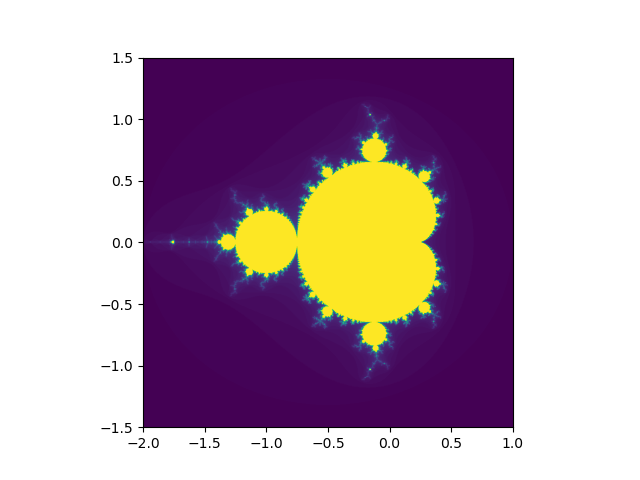

(-1.27, 0.04) --> (-0.20, 1.07)


C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_6384\2952477525.py:14: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < 2


In [32]:
from matplotlib.widgets import RectangleSelector

#funkce zajištťující přiblížení 
def select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")

    ax = plt.gca()
    ax.cla()
    
    #vytvoření mandelbrotovy množiny a vykreslení pouze označené části
    divergence_matrix = mandelbrot_set(x_min=min(x1, x2), x_max=max(x1, x2),
                                       y_min=min(y1, y2), y_max=max(y1, y2))
 
    ax.imshow(divergence_matrix, extent=(x1, x2, y1, y2))
    plt.gcf().canvas.draw()

#zde vytvořím Mandelbrotovu množinu
fig, ax = plt.subplots()
divergence_matrix = mandelbrot_set()
ax.imshow(divergence_matrix, extent=(-2, 1, -1.5, 1.5))

#vytvoření interaktivního prvnku, který označuje, kterou část chci přiblížit
selector = RectangleSelector(ax, select_callback,
                             minspanx=5, minspany=5, useblit=True,
                             button=[1], spancoords='pixels',
                             interactive=True)

#vykreslení grafu
plt.show()
